In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
import os
os.name
if  os.name == "nt":
    sns.set(font="Malgun Gothic")

In [4]:
df_40Y_rate = pd.read_csv(r'C:\Users\khm42\Downloads\DFF.csv', encoding="cp949", index_col="DATE")
df_40Y_rate

,DFF
DATE,
1980-01-01,14.77
1980-01-02,14.00
1980-01-03,13.89
1980-01-04,14.00
1980-01-05,14.00
...,...
2024-03-31,5.33
2024-04-01,5.33
2024-04-02,5.33


DFF    0.04
dtype: float64

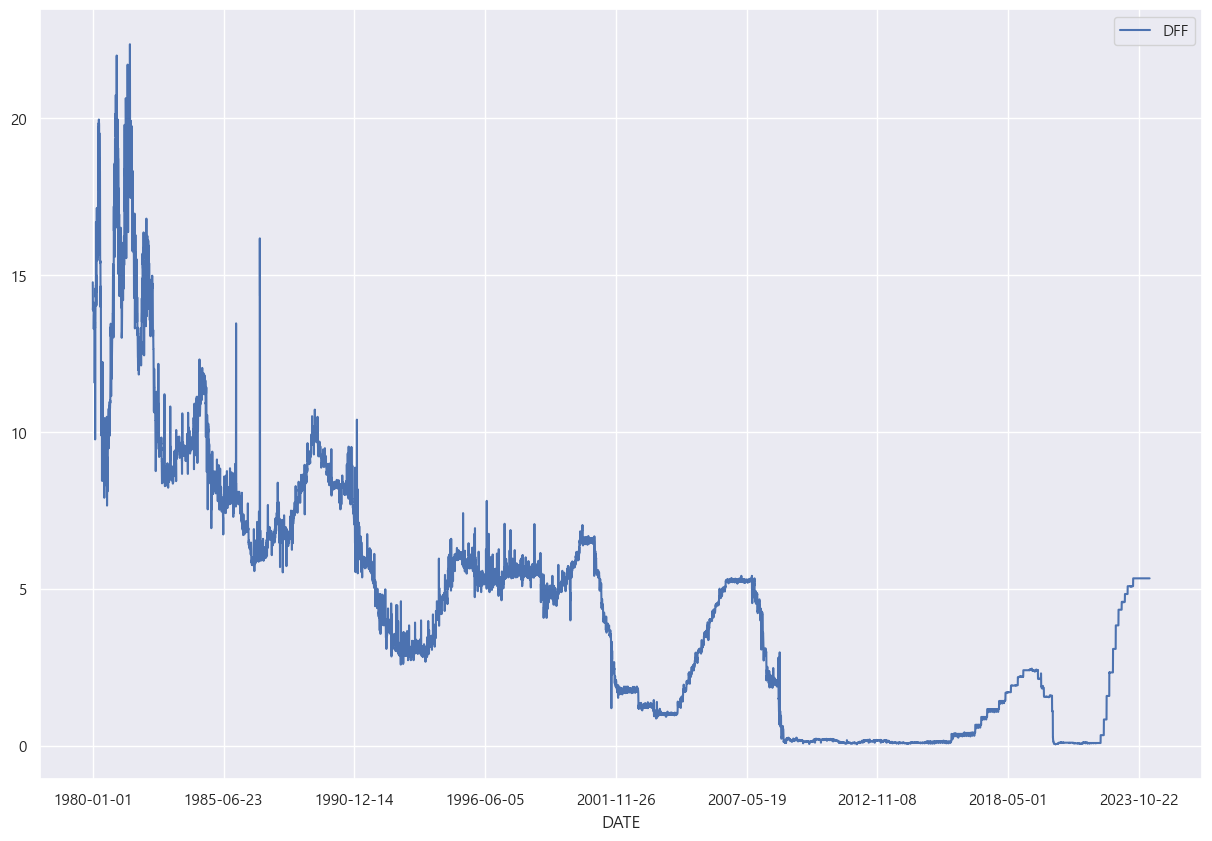

In [5]:
df_40Y_rate.plot(figsize = (15,10))
df_40Y_rate.min()

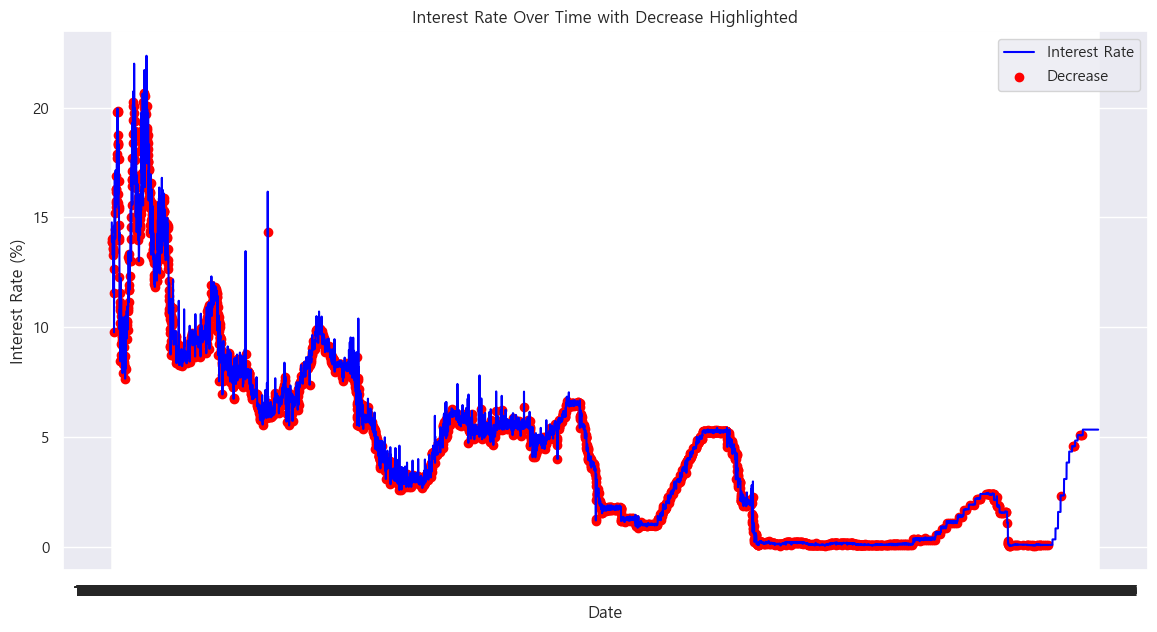

In [6]:
df_40Y_rate['RateChange'] = df_40Y_rate['DFF'].diff()
df_40Y_rate['Decrease'] = df_40Y_rate['RateChange'] < 0

plt.figure(figsize=(14, 7))
plt.plot(df_40Y_rate.index, df_40Y_rate['DFF'], label='Interest Rate', color='blue')
plt.scatter(df_40Y_rate[df_40Y_rate['Decrease']].index, df_40Y_rate[df_40Y_rate['Decrease']]['DFF'], color='red', label='Decrease')

plt.title('Interest Rate Over Time with Decrease Highlighted')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
df_sp500 = fdr.DataReader('SPY', '1980-01-01', '2023-12-31')

df_40Y_rate.index = pd.to_datetime(df_40Y_rate.index)
df_sp500.index = pd.to_datetime(df_sp500.index)
df_combined = pd.merge(df_40Y_rate, df_sp500, left_index=True, right_index=True, how='inner')
df_combined.rename(columns={'Close': 'SP500_Close'}, inplace=True)
df_combined.head()

,DFF,RateChange,Decrease,Open,High,Low,SP500_Close,Adj Close,Volume
1993-01-29,3.02,0.05,False,43.96875,43.96875,43.75000,43.93750,24.763735,1003200
1993-02-01,3.25,0.23,False,43.96875,44.25000,43.96875,44.25000,24.939875,480500
1993-02-02,3.18,-0.07,True,44.21875,44.37500,44.12500,44.34375,24.992710,201300
1993-02-03,3.56,0.38,False,44.40625,44.84375,44.37500,44.81250,25.256907,529400
1993-02-04,3.08,-0.48,True,44.96875,45.09375,44.46875,45.00000,25.362577,531500


In [14]:
df_combined['RateChange'] = df_combined['DFF'].diff() #금리 변화율 계산
df_combined['SP500_Change'] = df_combined['SP500_Close'].pct_change() #지수 일일 변화율 계산
df_combined.dropna(subset=['RateChange', 'SP500_Change'], inplace=True) #결측값 제거

X = df_combined[['RateChange']]
Y = df_combined['SP500_Change']

model = LinearRegression()
model.fit(X, Y)

print(f"Model coefficient (slope): {model.coef_[0]}")
print(f"Model intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, Y)}")

Model coefficient (slope): -0.0011891027093422306
Model intercept: 0.0003736257802085288
R-squared: 0.00021188708352504193


C:\Users\khm42\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


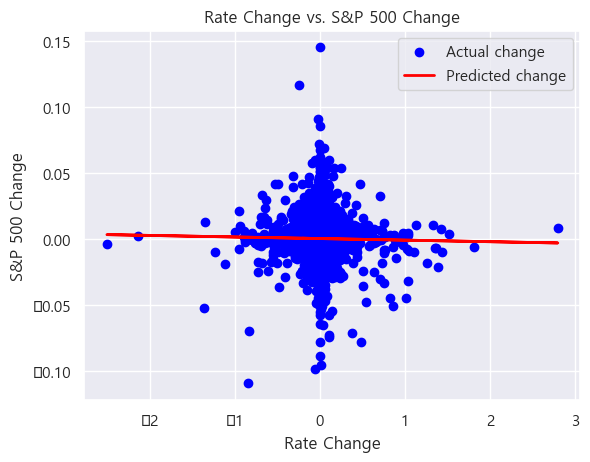

In [15]:
plt.scatter(X, Y, color='blue', label='Actual change')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted change')
plt.xlabel('Rate Change')
plt.ylabel('S&P 500 Change')
plt.title('Rate Change vs. S&P 500 Change')
plt.legend()
plt.show()